In [27]:
!pip install --upgrade opencv-python

     |████████████████████████████████| 51.0MB 60kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [24]:

!pip install opencv-python


In [1]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = "/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "/content/frozen_inference_graph.pb"

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
#     classLabels.append(fpt.read())

In [6]:
classLabels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
len(classLabels)

80

In [8]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5)) #MobileNet => [-1, -1]
model.setInputSwapRB(True)

<dnn_Model 0x7f0bfe172950>

In [9]:
# read an image

img = cv2.imread("man.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [10]:
a = model.detect(img)

In [11]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
#     cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
#     cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    
    
    



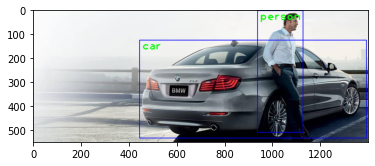

In [13]:
# It has detected the person and car
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [15]:
 from google.colab.patches import cv2_imshow

[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [10]]


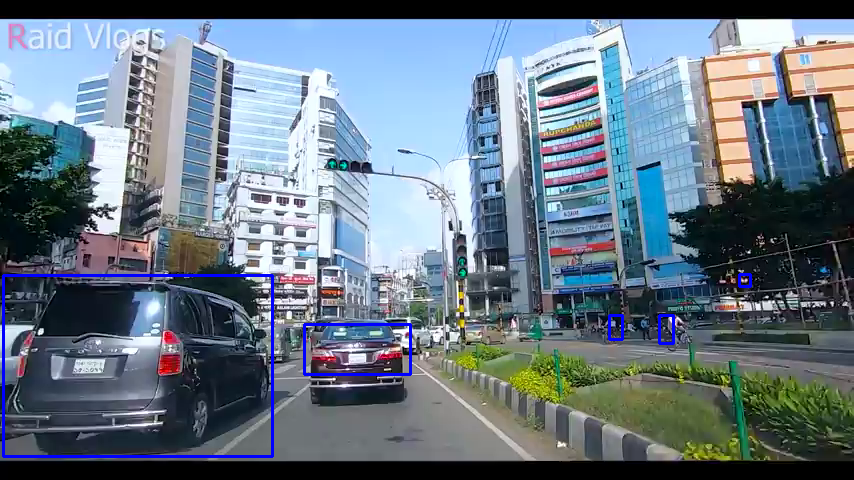

[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [10]]


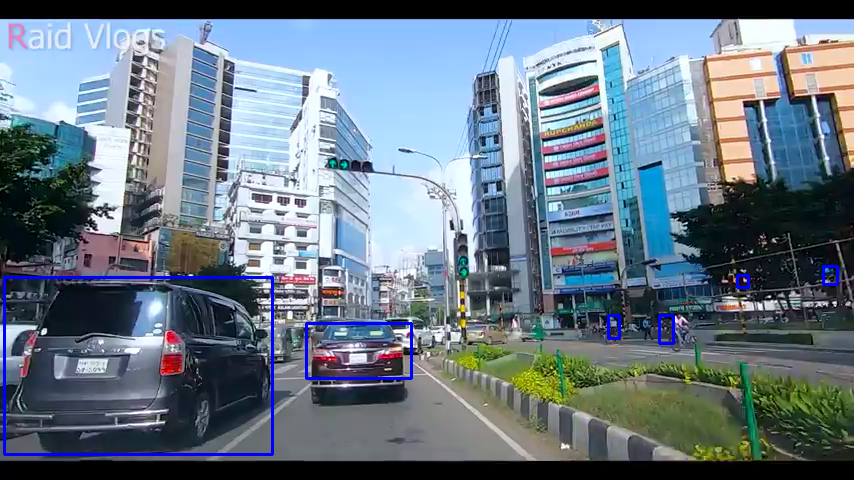

[[ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [10]]


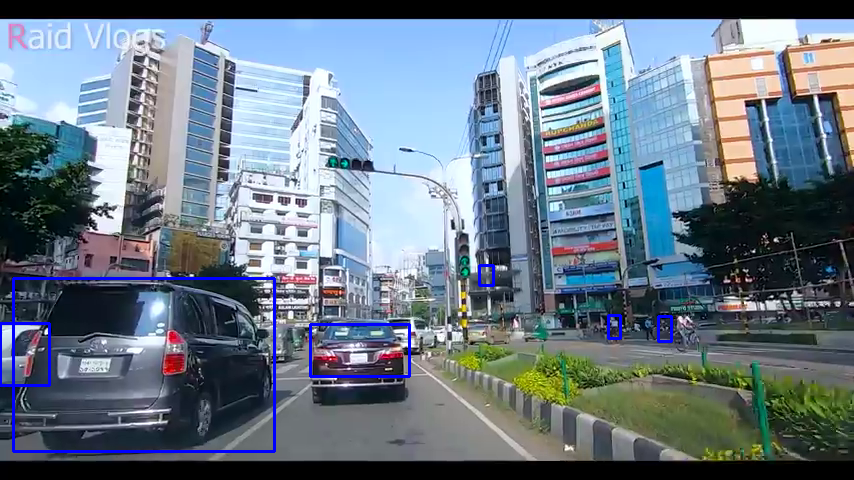

[[3]
 [3]
 [1]
 [3]
 [3]]


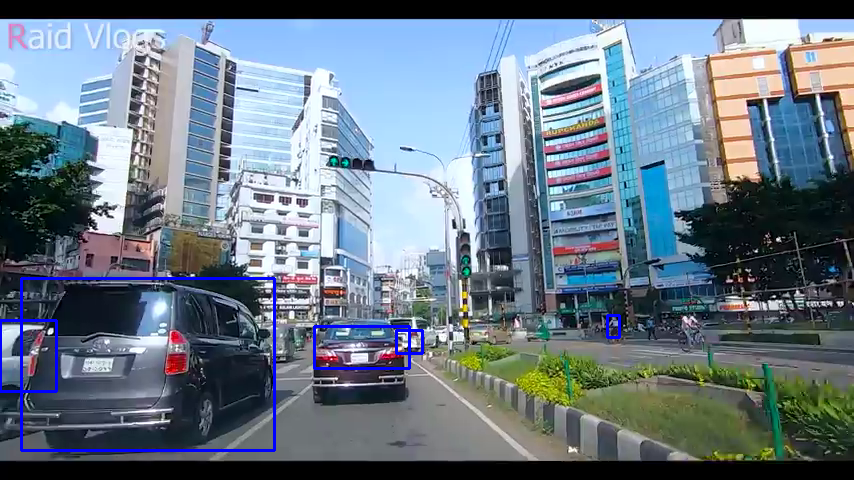

[[3]
 [3]
 [3]
 [1]
 [3]]


[[3]
 [3]
 [3]
 [1]
 [1]
 [3]]


[[3]
 [3]
 [3]
 [1]
 [3]
 [1]]


[[ 3]
 [ 3]
 [ 3]
 [10]]


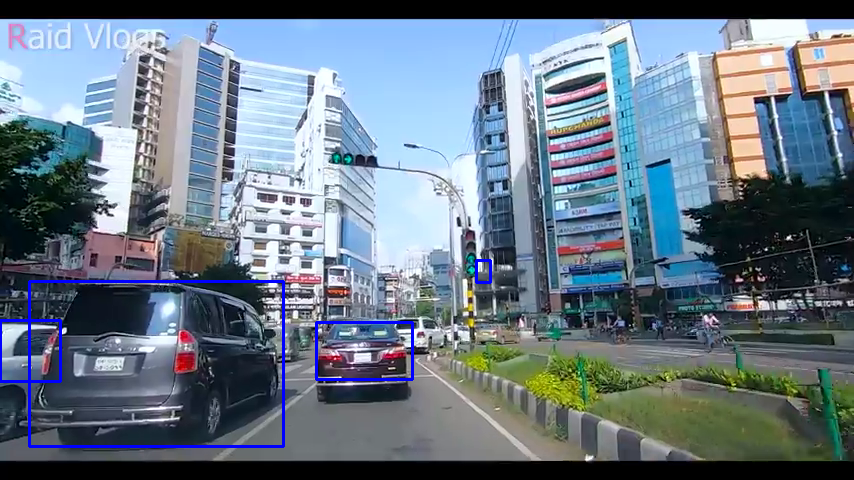

[[3]
 [3]
 [3]
 [3]]


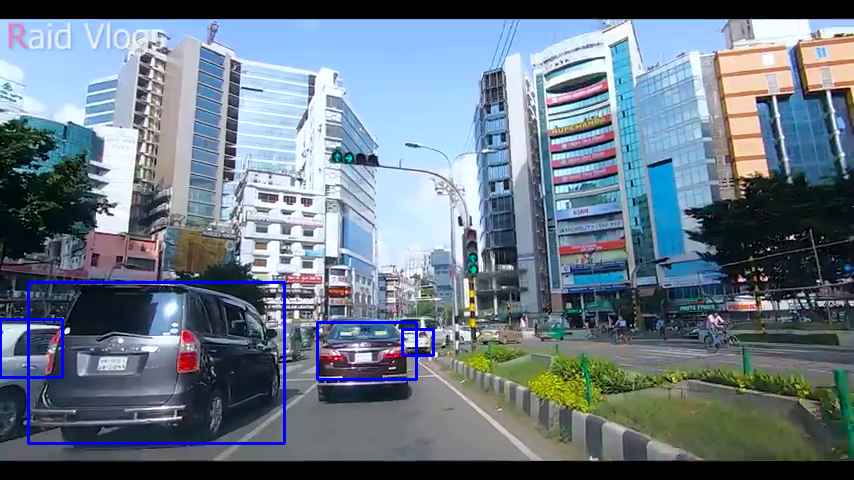

[[ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]]


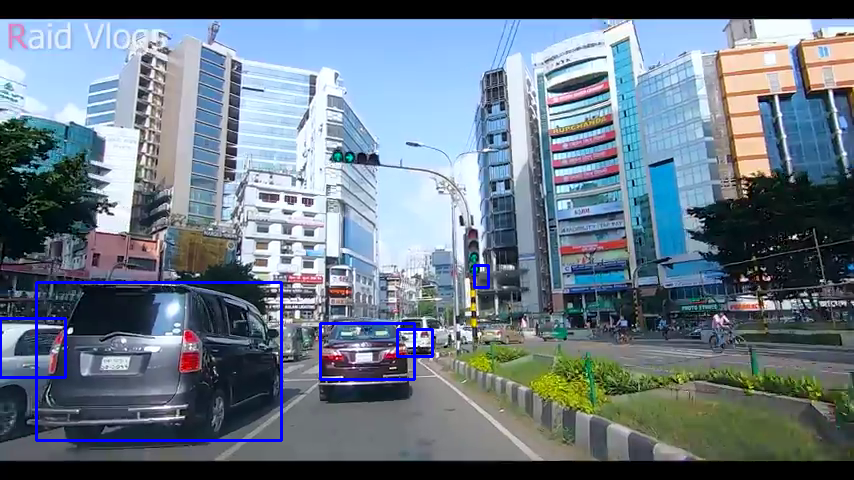

[[3]
 [3]
 [3]]


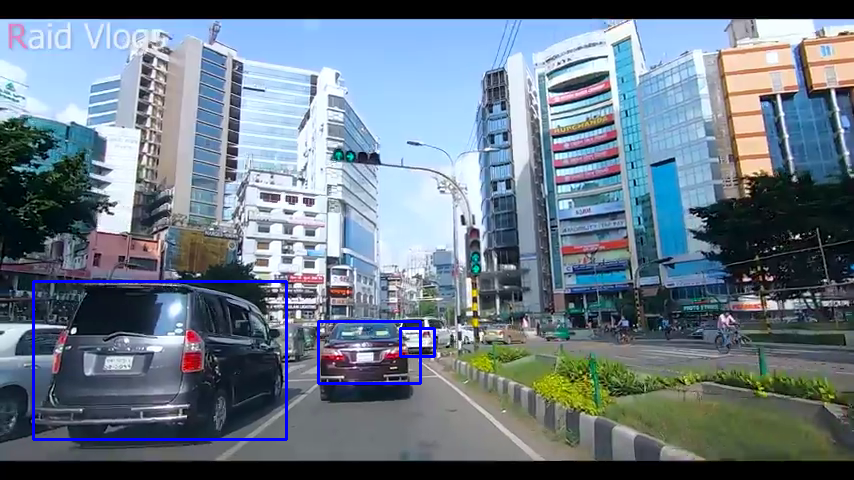

[[3]
 [3]]


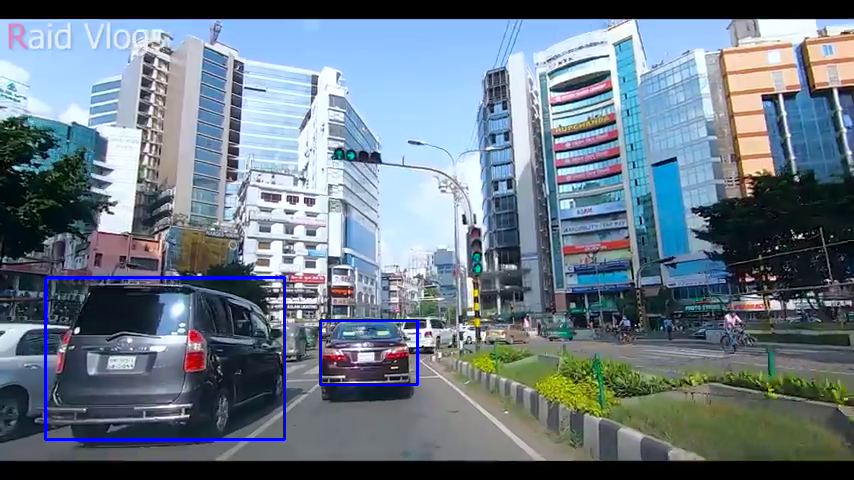

[[3]
 [3]
 [1]
 [1]
 [3]]


In [ ]:
# Video Demo

cap = cv2.VideoCapture("roadvideo.mp4")

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


  

    cv2_imshow( frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()